Loading Text from the Book

In [ ]:
import requests
from bs4 import BeautifulSoup
#import the data from the URL
url= "https://www.gutenberg.org/cache/epub/71927/pg71927-images.html#Part_First"
#printing the text
response = requests.get(url)
if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')

   
    text = soup.get_text()
#setting limitations on the amount of text to print
    text2= (text[:1000])
    print(text2)
else:
    print(f"Failed to fetch content. Status code: {response.status_code}")

In [4]:
#importing necessary packages
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Anusha
[nltk_data]     Gadgil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Breaking the Book into meaningful Paragraphs

In [5]:
book_text = soup.get_text()

# turn the book into paras
paragraphs = [p.strip() for p in book_text.split('\n') if p.strip()]

# creating chunks from the text
def chunk_text(text, chunk_size):
    chunks = []
    current_chunk = []
    for paragraph in text:
        current_chunk.append(paragraph)
        if len(current_chunk) >= chunk_size:
            chunks.append('\n'.join(current_chunk))
            current_chunk = []
    if current_chunk:
        chunks.append('\n'.join(current_chunk))
    return chunks

# making chunks
book_chunks = chunk_text(paragraphs, chunk_size=50)

for i, chunk in enumerate(book_chunks[:50]):
    print(f"Chunk {i + 1}:\n")
    print(chunk) #Print the entire chunk or paragraph
    print("\n---\n")

Chunk 1:

A Visit To the Roman Catacombs | Project Gutenberg
The Project Gutenberg eBook of A visit to the Roman catacombs
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.
Title: A visit to the Roman catacombs
Author: James Spencer Northcote
Release date: October 21, 2023 [eBook #71927]
Language: English
Original publication: London: S. Anselms's Society, 1891
Credits: deaurider and the Online Distributed Proofreading Team at https://www.pgdp.net (This file was produced from images generously made available by The Internet Archive)
*** START OF THE PROJECT GUTENBERG EBOOK A VISIT TO THE ROMAN CATACO

In [6]:
import spacy
#importing a pretrained nlp model
nlp = spacy.load("en_core_web_sm")

Removing Stop words and Punctuation from Text




       visit roman catacomb | project gutenberg 
    


















 project gutenberg ebook visit roman catacomb 
 ebook use united states 
 part world cost restriction 
 whatsoever copy away use term 
 project gutenberg license include ebook online 
 www.gutenberg.org locate united states 
 check law country locate 
 ebook 
 title visit roman catacomb 

 author james spencer northcote 

 release date october 21 2023 ebook 71927 
 language english 
 original publication london s. anselms society 1891 
 credit deaurider online distribute proofreading team https://www.pgdp.net file produce image generously available internet archive 

 start project gutenberg


In [9]:
from textblob import TextBlob

book_text = soup.get_text()

# Splitting the book into paragraphs
paragraphs = [p.strip() for p in book_text.split('\n') if p.strip()]

# forming sections
def chunk_text(text, chunk_size):
    chunks = []
    current_chunk = []
    for paragraph in text:
        current_chunk.append(paragraph)
        if len(current_chunk) >= chunk_size:
            chunks.append('\n'.join(current_chunk))
            current_chunk = []
    if current_chunk:
        chunks.append('\n'.join(current_chunk))
    return chunks


book_chunks = chunk_text(paragraphs, chunk_size=50)

#limiting the number of chunks
for i, chunk in enumerate(book_chunks[:50]):
    print(f"Chunk {i + 1}:\n")
    print(chunk)  # Print the entire chunk or paragraph
    print("\n---\n")

    # Perform sentiment analysis paragraph by paragraph
    blob = TextBlob(chunk)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    # Classify sentiments as positive, neutral, or negative
    if sentiment_polarity > 0:
        sentiment = "positive"
    elif sentiment_polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    
    # Print the sentiment analysis results for this paragraph
    print("Sentiment: ", sentiment)
    print("Polarity: ", sentiment_polarity)
    print("Subjectivity: ", sentiment_subjectivity)
    print("\n---\n")


Chunk 1:

A Visit To the Roman Catacombs | Project Gutenberg
The Project Gutenberg eBook of A visit to the Roman catacombs
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.
Title: A visit to the Roman catacombs
Author: James Spencer Northcote
Release date: October 21, 2023 [eBook #71927]
Language: English
Original publication: London: S. Anselms's Society, 1891
Credits: deaurider and the Online Distributed Proofreading Team at https://www.pgdp.net (This file was produced from images generously made available by The Internet Archive)
*** START OF THE PROJECT GUTENBERG EBOOK A VISIT TO THE ROMAN CATACO

Performing sentiment Analaysis for each Paragraph

In [10]:
from textblob import TextBlob
import pandas as pd

book_text = soup.get_text()

# Split the book into paragraphs
paragraphs = [p.strip() for p in book_text.split('\n') if p.strip()]

# Chunking the text into sections
def chunk_text(text, chunk_size):
    chunks = []
    current_chunk = []
    for paragraph in text:
        current_chunk.append(paragraph)
        if len(current_chunk) >= chunk_size:
            chunks.append('\n'.join(current_chunk))
            current_chunk = []
    if current_chunk:
        chunks.append('\n'.join(current_chunk))
    return chunks

# Chunking the text into sections
book_chunks = chunk_text(paragraphs, chunk_size=50)

# Create an empty list to store sentiment analysis results for all 50 chunks
sentiment_data = []

for i, chunk in enumerate(book_chunks[:50]):
    blob = TextBlob(chunk)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    if sentiment_polarity > 0:
        sentiment = "positive"
    elif sentiment_polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    # Append the sentiment analysis results to the data list
    sentiment_data.append({
        "Chunk Number": i + 1,
        
        "Sentiment": sentiment,
        "Polarity": sentiment_polarity,
        "Subjectivity": sentiment_subjectivity
    })

# Create a DataFrame from the sentiment_data list
sentiment_df = pd.DataFrame(sentiment_data)

# Save the DataFrame to a CSV file
sentiment_df.to_csv("sentiment_analysis_results.csv", index=False)

# Print the DataFrame (optional)
print(sentiment_df)

    Chunk Number Sentiment  Polarity  Subjectivity
0              1  positive  0.106300      0.306380
1              2  positive  0.036061      0.458758
2              3  positive  0.195089      0.444345
3              4  positive  0.181455      0.356848
4              5  positive  0.137233      0.375748
5              6  positive  0.071517      0.440195
6              7  positive  0.018859      0.423638
7              8  positive  0.034038      0.426958
8              9  positive  0.060714      0.451339
9             10  positive  0.061072      0.436858
10            11  positive  0.015254      0.447725
11            12  positive  0.191007      0.511954
12            13  positive  0.135976      0.347561
13            14  positive  0.035658      0.386111
14            15  positive  0.179369      0.576577
15            16  positive  0.075538      0.414250
16            17  positive  0.143071      0.393875
17            18  positive  0.086024      0.429536
18            19  positive  0.0

Plotting Polarity of each Paragraph

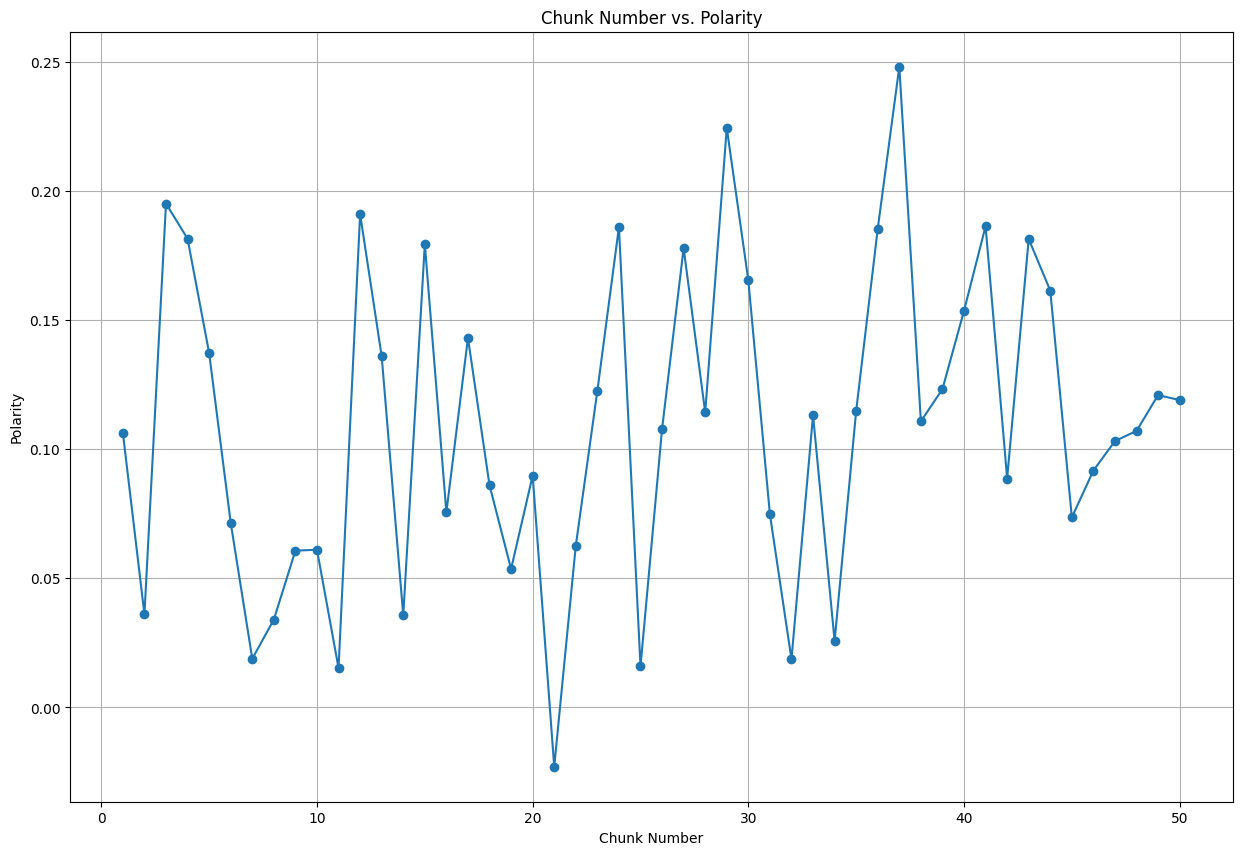

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Chunk Number",  # Replace with your actual chunk numbers
    "Polarity",
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting a line graph the line graph (inverted, Polarity vs. Chunk Number)
plt.figure(figsize=(15, 10))
plt.plot(sentiment_df['Chunk Number'], sentiment_df['Polarity'], marker='o', linestyle='-')
plt.title("Chunk Number vs. Polarity")
plt.xlabel("Chunk Number")
plt.ylabel("Polarity")
plt.grid(True)

# displaying the results of the plot
plt.show()

Conclusion:
The text from the book conveys a positive sentiment.